## Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
fd=pd.read_csv('flight.csv')
fd

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
4        5    97752          0         4         1         1       43300   
...    ...      ...        ...       ...       ...       ...         ...   
3994  4017    18476          0         1         1         1        8525   
3995  4018    64385          0         1         1         1         981   
3996  4019    73597          0         3         1         1       25447   
3997  4020    54899          0         1         1         1         500   
3998  4021     3016          0         1         1         1           0   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  
0              1                0              0             7000      0  
1              2                0              0             6968      0  
2              4                0              0             7034      0  
3              1                0              0             6952      0  
4             26             2077              4             6935      1  
...          ...              ...            ...              ...    ...  
3994           4              200              1             1403      1  
3995           5                0              0             1395      1  
3996           8                0              0             1402      1  
3997           1              500              1             1401      0  
3998           0                0              0             1398      0  

[3999 rows x 12 columns]

In [3]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               3999 non-null   int64
 1   Balance          3999 non-null   int64
 2   Qualmiles        3999 non-null   int64
 3   cc1miles         3999 non-null   int64
 4   cc2miles         3999 non-null   int64
 5   cc3miles         3999 non-null   int64
 6   Bonusmiles       3999 non-null   int64
 7   Bonustrans       3999 non-null   int64
 8   Flightmiles12mo  3999 non-null   int64
 9   Flighttrans12    3999 non-null   int64
 10  Dayssinceenroll  3999 non-null   int64
 11  Award            3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
fd[fd.duplicated()] # Prints duplicated rows (no duplicate rows found)

Empty DataFrame
Columns: [ID, Balance, Qualmiles, cc1miles, cc2miles, cc3miles, Bonusmiles, Bonustrans, Flightmiles12mo, Flighttrans12, Dayssinceenroll, Award]
Index: []

In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [6]:
fd_norm = norm_func(fd.iloc[:,1:])
fd_norm

Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0     0.016508        0.0      0.00       0.0       0.0    0.000660   
1     0.011288        0.0      0.00       0.0       0.0    0.000815   
2     0.024257        0.0      0.00       0.0       0.0    0.015636   
3     0.008667        0.0      0.00       0.0       0.0    0.001896   
4     0.057338        0.0      0.75       0.0       0.0    0.164211   
...        ...        ...       ...       ...       ...         ...   
3994  0.010837        0.0      0.00       0.0       0.0    0.032330   
3995  0.037766        0.0      0.00       0.0       0.0    0.003720   
3996  0.043169        0.0      0.50       0.0       0.0    0.096505   
3997  0.032202        0.0      0.00       0.0       0.0    0.001896   
3998  0.001769        0.0      0.00       0.0       0.0    0.000000   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  
0       0.011628         0.000000       0.000000         0.843742    0.0  
1       0.023256         0.000000       0.000000         0.839884    0.0  
2       0.046512         0.000000       0.000000         0.847842    0.0  
3       0.011628         0.000000       0.000000         0.837955    0.0  
4       0.302326         0.067398       0.075472         0.835905    1.0  
...          ...              ...            ...              ...    ...  
3994    0.046512         0.006490       0.018868         0.168917    1.0  
3995    0.058140         0.000000       0.000000         0.167953    1.0  
3996    0.093023         0.000000       0.000000         0.168797    1.0  
3997    0.011628         0.016225       0.018868         0.168676    0.0  
3998    0.000000         0.000000       0.000000         0.168314    0.0  

[3999 rows x 11 columns]

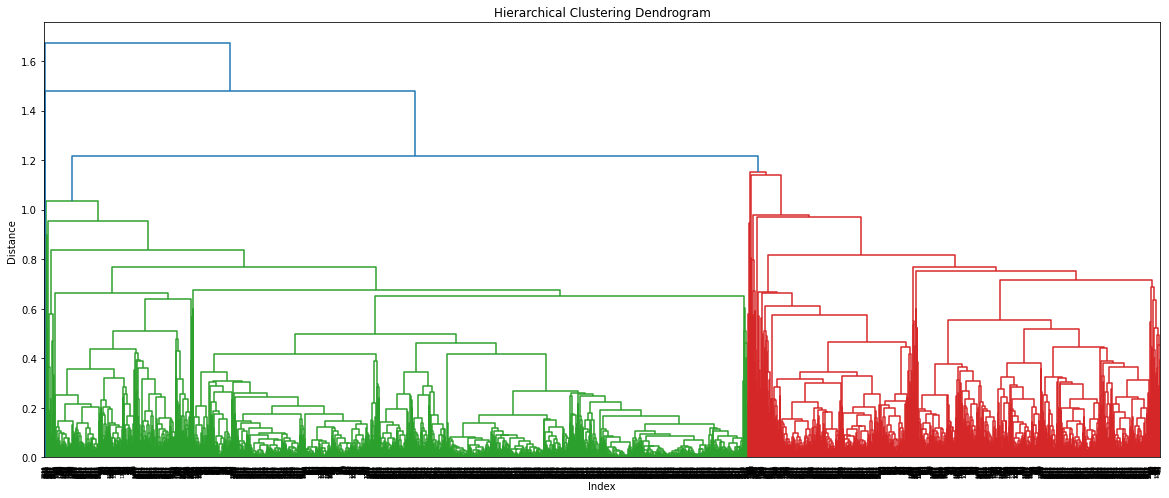

In [7]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(fd_norm) # converting into numpy array format 
z = linkage(fd_norm, method="average",metric="euclidean")
plt.figure(figsize=(20, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [8]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(fd_norm) 

clusterid=pd.Series(h_complete.labels_)
clusterid

0       1
1       1
2       1
3       1
4       0
       ..
3994    0
3995    0
3996    0
3997    1
3998    1
Length: 3999, dtype: int64

In [9]:
fd['clust']=clusterid # creating a  new column and joining in the existing dataset, which shows which column belongs to which cluster
fd

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
4        5    97752          0         4         1         1       43300   
...    ...      ...        ...       ...       ...       ...         ...   
3994  4017    18476          0         1         1         1        8525   
3995  4018    64385          0         1         1         1         981   
3996  4019    73597          0         3         1         1       25447   
3997  4020    54899          0         1         1         1         500   
3998  4021     3016          0         1         1         1           0   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
0              1                0              0             7000      0   
1              2                0              0             6968      0   
2              4                0              0             7034      0   
3              1                0              0             6952      0   
4             26             2077              4             6935      1   
...          ...              ...            ...              ...    ...   
3994           4              200              1             1403      1   
3995           5                0              0             1395      1   
3996           8                0              0             1402      1   
3997           1              500              1             1401      0   
3998           0                0              0             1398      0   

      clust  
0         1  
1         1  
2         1  
3         1  
4         0  
...     ...  
3994      0  
3995      0  
3996      0  
3997      1  
3998      1  

[3999 rows x 13 columns]

In [10]:
fd.iloc[:,1:].groupby(fd.clust).mean()   

Balance   Qualmiles  cc1miles  cc2miles  cc3miles     Bonusmiles  \
clust                                                                          
0      9.597426e+04  240.572888  2.656676  1.015668  1.000681   28342.702997   
1      5.980784e+04   87.602462  1.705322  1.013900  1.008737   10227.689039   
2      1.704838e+06    0.000000  1.000000  1.000000  1.000000   17108.000000   
3      1.319995e+05  347.000000  2.500000  1.000000  1.000000   65634.250000   
4      7.656512e+04  147.750000  3.875000  1.000000  4.250000  115273.250000   

       Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
clust                                                                       
0       15.547003       804.152589       2.461853      4627.118529    1.0   
1        9.142971       226.292295       0.652502      3820.652105    0.0   
2       32.000000      4823.000000      23.000000      7283.000000    1.0   
3       69.250000     19960.000000      49.250000      2200.250000    1.0   
4       30.250000       600.000000       2.000000      5127.875000    1.0   

       clust  
clust         
0        0.0  
1        1.0  
2        2.0  
3        3.0  
4        4.0

In [11]:
fd.groupby(["clust"])["Balance"].apply(lambda x:tuple(x)) # to see the balance of customers belonging to different clusters

clust
0    (97752, 20856, 443003, 104860, 96522, 28495, 5...
1    (28143, 19244, 41354, 14776, 16420, 84914, 400...
2                                           (1704838,)
3                       (53232, 287033, 160114, 27619)
4    (96627, 28193, 25629, 15835, 128302, 82981, 12...
Name: Balance, dtype: object

In [12]:
data = fd[(fd.clust==1)]
data   

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
5        6    16420          0         1         1         1           0   
...    ...      ...        ...       ...       ...       ...         ...   
3991  4014    39142          0         3         1         1       14981   
3992  4015    11181          0         1         1         1         929   
3993  4016     3974          0         1         1         1         365   
3997  4020    54899          0         1         1         1         500   
3998  4021     3016          0         1         1         1           0   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
0              1                0              0             7000      0   
1              2                0              0             6968      0   
2              4                0              0             7034      0   
3              1                0              0             6952      0   
5              0                0              0             6942      0   
...          ...              ...            ...              ...    ...   
3991          28                0              0             1408      0   
3992          12                0              0             1407      0   
3993           3                0              0             1397      0   
3997           1              500              1             1401      0   
3998           0                0              0             1398      0   

      clust  
0         1  
1         1  
2         1  
3         1  
5         1  
...     ...  
3991      1  
3992      1  
3993      1  
3997      1  
3998      1  

[2518 rows x 13 columns]

In [13]:
data = fd[(fd.clust==0)]
data   

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
4        5    97752          0         4         1         1       43300   
7        8    20856          0         1         1         1        5250   
8        9   443003          0         3         2         1        1753   
9       10   104860          0         3         1         1       28426   
11      12    96522          0         5         1         1       61105   
...    ...      ...        ...       ...       ...       ...         ...   
3987  4010    11933          0         1         1         1         249   
3989  4012     2622          0         1         1         1        1625   
3994  4017    18476          0         1         1         1        8525   
3995  4018    64385          0         1         1         1         981   
3996  4019    73597          0         3         1         1       25447   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
4             26             2077              4             6935      1   
7              4              250              1             6938      1   
8             43             3850             12             6948      1   
9             28             1150              3             6931      1   
11            19                0              0             6924      1   
...          ...              ...            ...              ...    ...   
3987           3               79              1             1412      1   
3989           6                0              0             1404      1   
3994           4              200              1             1403      1   
3995           5                0              0             1395      1   
3996           8                0              0             1402      1   

      clust  
4         0  
7         0  
8         0  
9         0  
11        0  
...     ...  
3987      0  
3989      0  
3994      0  
3995      0  
3996      0  

[1468 rows x 13 columns]

In [14]:
data = fd[(fd.clust==2)]
data   

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
275  279  1704838          0         1         1         1       17108   

     Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  clust  
275          32             4823             23             7283      1      2

In [15]:
data = fd[(fd.clust==3)]
data   

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
2015  2032    53232        888         4         1         1       80696   
3235  3257   287033          0         1         1         1       26161   
3583  3606   160114        500         1         1         1       71954   
3594  3617    27619          0         4         1         1       83726   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
2015          65            22100             45             3831      1   
3235          58            12873             53             2272      1   
3583          86            30817             53             1373      1   
3594          68            14050             46             1325      1   

      clust  
2015      3  
3235      3  
3583      3  
3594      3

In [56]:
data = fd[(fd.clust==4)]
data

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
106    109    96627       1182         1         1         3       49059   
384    389    28193          0         5         1         4      103456   
850    861    25629          0         4         1         5      107308   
904    915    15835          0         2         1         5      112171   
1878  1895   128302          0         5         1         4      132263   
1917  1934    82981          0         5         1         3      105325   
1946  1963   126873          0         4         1         5       95598   
2364  2382   108081          0         5         1         5      217006   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
106           26             2300              9             6738      1   
384           32                0              0             6980      1   
850           36              600              2             5966      1   
904           16                0              0             5825      1   
1878          32              400              2             4103      1   
1917          44             1000              2             3964      1   
1946          32              500              1             3880      1   
2364          24                0              0             3567      1   

      clust  
106       4  
384       4  
850       4  
904       4  
1878      4  
1917      4  
1946      4  
2364      4

## K-Means

In [16]:
gd=pd.read_csv('flight.csv')
gd

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
4        5    97752          0         4         1         1       43300   
...    ...      ...        ...       ...       ...       ...         ...   
3994  4017    18476          0         1         1         1        8525   
3995  4018    64385          0         1         1         1         981   
3996  4019    73597          0         3         1         1       25447   
3997  4020    54899          0         1         1         1         500   
3998  4021     3016          0         1         1         1           0   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  
0              1                0              0             7000      0  
1              2                0              0             6968      0  
2              4                0              0             7034      0  
3              1                0              0             6952      0  
4             26             2077              4             6935      1  
...          ...              ...            ...              ...    ...  
3994           4              200              1             1403      1  
3995           5                0              0             1395      1  
3996           8                0              0             1402      1  
3997           1              500              1             1401      0  
3998           0                0              0             1398      0  

[3999 rows x 12 columns]

In [17]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(gd.iloc[:,1:]))
data   

0    1     2    3    4         5         6         7         8   \
0     0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1     0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2     0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3     0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4     0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   
...        ...  ...   ...  ...  ...       ...       ...       ...       ...   
3994  0.010837  0.0  0.00  0.0  0.0  0.032330  0.046512  0.006490  0.018868   
3995  0.037766  0.0  0.00  0.0  0.0  0.003720  0.058140  0.000000  0.000000   
3996  0.043169  0.0  0.50  0.0  0.0  0.096505  0.093023  0.000000  0.000000   
3997  0.032202  0.0  0.00  0.0  0.0  0.001896  0.011628  0.016225  0.018868   
3998  0.001769  0.0  0.00  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

            9    10  
0     0.843742  0.0  
1     0.839884  0.0  
2     0.847842  0.0  
3     0.837955  0.0  
4     0.835905  1.0  
...        ...  ...  
3994  0.168917  1.0  
3995  0.167953  1.0  
3996  0.168797  1.0  
3997  0.168676  0.0  
3998  0.168314  0.0  

[3999 rows x 11 columns]

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans=KMeans(n_clusters=3, random_state=42) # to create the model
kmeans.fit(data) # putting the scaled data within the model

KMeans(n_clusters=3, random_state=42)

In [20]:
kmeans.inertia_

625.1684881570719

In [21]:
wcss=[]
for i in range(1, 11): # to find for which value of K (from 1 to 10) we have the best wcss value(inertia_)
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

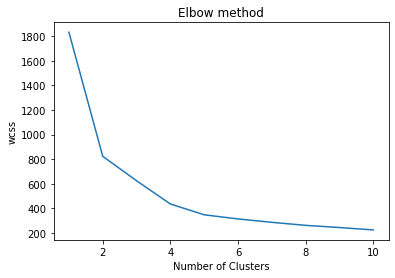

In [22]:
# Creating plot to find the optimum number of clusters using the Elbow method
plt.plot(range(1,11),wcss)  
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show

In [23]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
cluster_new= KMeans(2,random_state=42)
cluster_new.fit(data)

KMeans(n_clusters=2, random_state=42)

In [24]:
cluster_new.labels_ # Creating clusters for different rows

array([1, 1, 1, ..., 0, 1, 1])

In [25]:
# Assign cluster to the dataset by creating new column 
gd['clusterid_new']=cluster_new.labels_ 

In [26]:
gd

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
4        5    97752          0         4         1         1       43300   
...    ...      ...        ...       ...       ...       ...         ...   
3994  4017    18476          0         1         1         1        8525   
3995  4018    64385          0         1         1         1         981   
3996  4019    73597          0         3         1         1       25447   
3997  4020    54899          0         1         1         1         500   
3998  4021     3016          0         1         1         1           0   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
0              1                0              0             7000      0   
1              2                0              0             6968      0   
2              4                0              0             7034      0   
3              1                0              0             6952      0   
4             26             2077              4             6935      1   
...          ...              ...            ...              ...    ...   
3994           4              200              1             1403      1   
3995           5                0              0             1395      1   
3996           8                0              0             1402      1   
3997           1              500              1             1401      0   
3998           0                0              0             1398      0   

      clusterid_new  
0                 1  
1                 1  
2                 1  
3                 1  
4                 0  
...             ...  
3994              0  
3995              0  
3996              0  
3997              1  
3998              1  

[3999 rows x 13 columns]

In [27]:
gd.groupby('clusterid_new').agg(['mean'])

ID       Balance   Qualmiles  cc1miles cc2miles  \
                      mean          mean        mean      mean     mean   
clusterid_new                                                             
0              1745.592843  97053.051317  240.196489  2.661715  1.01553   
1              2173.169182  59807.839555   87.602462  1.705322  1.01390   

               cc3miles    Bonusmiles Bonustrans Flightmiles12mo  \
                   mean          mean       mean            mean   
clusterid_new                                                      
0              1.018231  28905.414585  15.782579      857.501013   
1              1.008737  10227.689039   9.142971      226.292295   

              Flighttrans12 Dayssinceenroll Award  
                       mean            mean  mean  
clusterid_new                                      
0                  2.599595     4625.062120   1.0  
1                  0.652502     3820.652105   0.0

In [28]:
gd[gd['clusterid_new'] ==0]

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
4        5    97752          0         4         1         1       43300   
7        8    20856          0         1         1         1        5250   
8        9   443003          0         3         2         1        1753   
9       10   104860          0         3         1         1       28426   
11      12    96522          0         5         1         1       61105   
...    ...      ...        ...       ...       ...       ...         ...   
3987  4010    11933          0         1         1         1         249   
3989  4012     2622          0         1         1         1        1625   
3994  4017    18476          0         1         1         1        8525   
3995  4018    64385          0         1         1         1         981   
3996  4019    73597          0         3         1         1       25447   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
4             26             2077              4             6935      1   
7              4              250              1             6938      1   
8             43             3850             12             6948      1   
9             28             1150              3             6931      1   
11            19                0              0             6924      1   
...          ...              ...            ...              ...    ...   
3987           3               79              1             1412      1   
3989           6                0              0             1404      1   
3994           4              200              1             1403      1   
3995           5                0              0             1395      1   
3996           8                0              0             1402      1   

      clusterid_new  
4                 0  
7                 0  
8                 0  
9                 0  
11                0  
...             ...  
3987              0  
3989              0  
3994              0  
3995              0  
3996              0  

[1481 rows x 13 columns]

In [29]:
gd[gd['clusterid_new'] ==1]

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
5        6    16420          0         1         1         1           0   
...    ...      ...        ...       ...       ...       ...         ...   
3991  4014    39142          0         3         1         1       14981   
3992  4015    11181          0         1         1         1         929   
3993  4016     3974          0         1         1         1         365   
3997  4020    54899          0         1         1         1         500   
3998  4021     3016          0         1         1         1           0   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  \
0              1                0              0             7000      0   
1              2                0              0             6968      0   
2              4                0              0             7034      0   
3              1                0              0             6952      0   
5              0                0              0             6942      0   
...          ...              ...            ...              ...    ...   
3991          28                0              0             1408      0   
3992          12                0              0             1407      0   
3993           3                0              0             1397      0   
3997           1              500              1             1401      0   
3998           0                0              0             1398      0   

      clusterid_new  
0                 1  
1                 1  
2                 1  
3                 1  
5                 1  
...             ...  
3991              1  
3992              1  
3993              1  
3997              1  
3998              1  

[2518 rows x 13 columns]

## DBSCAN

In [30]:
# Importing librabries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from sklearn.metrics import silhouette_score as sil 

In [31]:
dd=pd.read_csv('flight.csv')
dd

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
4        5    97752          0         4         1         1       43300   
...    ...      ...        ...       ...       ...       ...         ...   
3994  4017    18476          0         1         1         1        8525   
3995  4018    64385          0         1         1         1         981   
3996  4019    73597          0         3         1         1       25447   
3997  4020    54899          0         1         1         1         500   
3998  4021     3016          0         1         1         1           0   

      Bonustrans  Flightmiles12mo  Flighttrans12  Dayssinceenroll  Award  
0              1                0              0             7000      0  
1              2                0              0             6968      0  
2              4                0              0             7034      0  
3              1                0              0             6952      0  
4             26             2077              4             6935      1  
...          ...              ...            ...              ...    ...  
3994           4              200              1             1403      1  
3995           5                0              0             1395      1  
3996           8                0              0             1402      1  
3997           1              500              1             1401      0  
3998           0                0              0             1398      0  

[3999 rows x 12 columns]

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [33]:
array=dd.values
array 

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [34]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [35]:
# to find the optimal eps value
neigh=NearestNeighbors (n_neighbors=12)
nbr=neigh.fit(X)
distances, indices = nbr.kneighbors(X)

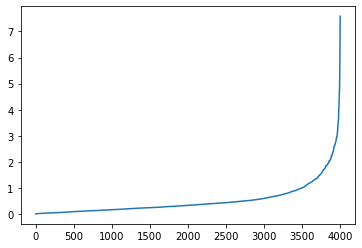

In [36]:
distances =np.sort(distances, axis=0)
distances =  distances[:,1]
plt.plot(distances)
# from the below curve we can say eps is 1.25 as the curve starts to bend around that point.

In [37]:
dbscan= DBSCAN(eps=1.25, min_samples=12) # min samples is taken at random as the number of features is 11 so the min sam could be 2*11 or 3*11
dbscan.fit(X)

DBSCAN(eps=1.25, min_samples=12)

In [38]:
dbscan.labels_  # Noisy samples are given as -1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [40]:
cl
pd.set_option("display.max_rows", None) 

In [41]:
df1 = pd.concat([dd,cl],axis=1) 
df1  

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
4        5    97752          0         4         1         1       43300   
5        6    16420          0         1         1         1           0   
6        7    84914          0         3         1         1       27482   
7        8    20856          0         1         1         1        5250   
8        9   443003          0         3         2         1        1753   
9       10   104860          0         3         1         1       28426   
10      11    40091          0         2         1         1        7278   
11      12    96522          0         5         1         1       61105   
12      13    43382          0         2         1         1       11150   
13      14    43097          0         1         1         1        3258   
14      15    17648          0         1         1         1           0   
15      16    28495          0         4         1         1       49442   
16      17    51890          0         4         1         1       48963   
17      18    13958          0         1         1         1        4291   
18      19    91473          0         3         1         1       27408   
19      20    23354          0         3         1         1       10447   
20      21   120576          0         5         1         1       58831   
21      22   185681       2024         1         1         1       13300   
22      23    20584          0         1         1         1        3450   
23      24    66275          0         1         1         1        2533   
24      25   205651        500         1         1         1        4025   
25      26    20726          0         1         1         1        1375   
26      27    18521          0         1         1         1        1227   
27      28     8828          0         1         1         1           0   
28      29    59763          0         3         1         1       33772   
29      30    19221          0         1         1         1        4655   
30      31   177926          0         3         1         1       20797   
31      32    10021          0         1         1         1           0   
32      33   276571          0         4         1         1       42044   
33      34    18047          0         1         1         1         100   
34      35    43832          0         1         1         1           0   
35      36   123759          0         4         1         1       50572   
36      37    23193          0         1         1         1         650   
37      38    68666          0         1         1         1         350   
38      39    59990          0         3         1         1       27878   
39      40     2176          0         1         1         1           0   
40      41    34616          0         1         1         1        1750   
41      42    10470          0         4         1         1       38094   
42      43    60313          0         1         1         1       10000   
43      44   619393          0         3         1         1       15008   
44      45   121260          0         3         1         1       18493   
45      46   288865        967         1         1         1       23600   
46      47    92336          0         2         1         1       11214   
47      48    36924          0         1         1         1        5900   
48      49    70312          0         3         1         1       34678   
49      50    17051          0         1         1         1        1150   
50      51   108137          0         1         1         1        6368   
51      52     1300          0         1         1      

Text(0.5, 1.0, 'Clusters using DBScan')

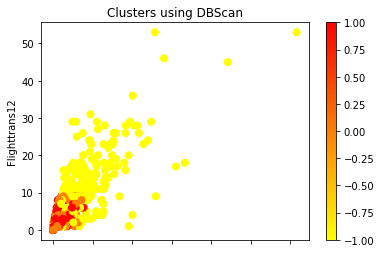

In [42]:
df1.plot(x="Flightmiles12mo",y ="Flighttrans12",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.autumn_r) 
plt.title('Clusters using DBScan') # we can see homogenous clusters with less overlapping

In [44]:
df1[df1['cluster'] ==0]

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
0        1    28143          0         1         1         1         174   
1        2    19244          0         1         1         1         215   
2        3    41354          0         1         1         1        4123   
3        4    14776          0         1         1         1         500   
5        6    16420          0         1         1         1           0   
6        7    84914          0         3         1         1       27482   
10      11    40091          0         2         1         1        7278   
12      13    43382          0         2         1         1       11150   
13      14    43097          0         1         1         1        3258   
14      15    17648          0         1         1         1           0   
23      24    66275          0         1         1         1        2533   
25      26    20726          0         1         1         1        1375   
26      27    18521          0         1         1         1        1227   
27      28     8828          0         1         1         1           0   
30      31   177926          0         3         1         1       20797   
31      32    10021          0         1         1         1           0   
32      33   276571          0         4         1         1       42044   
33      34    18047          0         1         1         1         100   
34      35    43832          0         1         1         1           0   
37      38    68666          0         1         1         1         350   
40      41    34616          0         1         1         1        1750   
44      45   121260          0         3         1         1       18493   
46      47    92336          0         2         1         1       11214   
49      50    17051          0         1         1         1        1150   
51      52     1300          0         1         1         1         370   
54      55    38348          0         1         1         1           0   
55      56    14448          0         1         1         1        1625   
56      57    75971          0         4         1         1       34339   
58      59    38077          0         3         1         1       34024   
60      61   134457          0         3         1         1       15588   
61      62    19918          0         1         1         1       17601   
62      63    10120          0         1         1         1           0   
64      65    80250          0         1         1         1         895   
66      67     9375          0         1         1         1        1750   
67      68    83237          0         4         1         1       35287   
71      73   252386          0         4         1         1       39787   
73      75    12646          0         1         1         1         631   
74      76   123867          0         3         1         1       25308   
75      78   129871          0         3         1         1       15776   
76      79   109380          0         1         1         1        7537   
77      80   111157          0         4         1         1       32883   
81      84    88443          0         1         1         1        1200   
82      85     8454          0         1         1         1         498   
83      86    61990          0         1         1         1        1625   
84      87    24093          0         1         1         1        1750   
88      91    62553          0         2         1         1        7672   
91      94     2000          0         1         1         1        2000   
95      98    16796          0         1         1         1        2875   
96      99    57346          0         1         1         1        5560   
97     100   102062          0         4         1         1       44247   
98     101    22324          0         1         1         1        1375   
102    105    35119          0         1         1      

In [45]:
df1[df1['cluster'] ==1] 

ID  Balance  Qualmiles  cc1miles  cc2miles  cc3miles  Bonusmiles  \
4        5    97752          0         4         1         1       43300   
7        8    20856          0         1         1         1        5250   
9       10   104860          0         3         1         1       28426   
11      12    96522          0         5         1         1       61105   
15      16    28495          0         4         1         1       49442   
16      17    51890          0         4         1         1       48963   
17      18    13958          0         1         1         1        4291   
18      19    91473          0         3         1         1       27408   
19      20    23354          0         3         1         1       10447   
20      21   120576          0         5         1         1       58831   
28      29    59763          0         3         1         1       33772   
29      30    19221          0         1         1         1        4655   
35      36   123759          0         4         1         1       50572   
36      37    23193          0         1         1         1         650   
38      39    59990          0         3         1         1       27878   
39      40     2176          0         1         1         1           0   
41      42    10470          0         4         1         1       38094   
47      48    36924          0         1         1         1        5900   
48      49    70312          0         3         1         1       34678   
53      54   121395          0         1         1         1        4970   
57      58    36298          0         1         1         1        3100   
68      69   230715          0         3         1         1       24047   
69      71    47457          0         3         1         1       12621   
78      81    49238          0         4         1         1       38037   
79      82    38896          0         5         1         1       76988   
80      83     4340          0         1         1         1       32685   
85      88    35418          0         5         1         1       58557   
86      89    40284          0         1         1         1        7719   
89      92    48433          0         1         1         1        3500   
90      93    20508          0         1         1         1       22250   
92      95    78629          0         4         1         1       36679   
93      96   143566          0         1         1         1        5000   
99     102    64824          0         3         1         1       20184   
101    104     8053          0         1         1         1           0   
103    106    28667          0         1         1         1        3861   
105    108     3734          0         5         1         1       61096   
107    110    43498          0         1         1         1           0   
108    111    84674          0         4         1         1       46335   
109    112    15098          0         4         1         1       32917   
113    116    56906          0         1         1         1        2015   
118    121   122705          0         3         1         1       24222   
119    122    16583          0         1         1         1        2625   
122    125    81974          0         4         1         1       37266   
123    126    47258          0         3         1         1       24768   
125    128   133954        500         4         1         1       37670   
128    131    48333          0         2         1         1       10123   
129    132   142175          0         4         1         1       37461   
130    133    17469          0         1         1         1           0   
131    134    19823          0         1         1         1        1095   
132    135   145074          0         1         1         1        8000   
133    136   101101          0         1         1         1       10850   
134    137   125948          0         3         1      

In [46]:
df1.groupby('Award').agg(['mean'])

ID       Balance   Qualmiles  cc1miles cc2miles  cc3miles  \
              mean          mean        mean      mean     mean      mean   
Award                                                                       
0      2173.169182  59807.839555   87.602462  1.705322  1.01390  1.008737   
1      1745.592843  97053.051317  240.196489  2.661715  1.01553  1.018231   

         Bonusmiles Bonustrans Flightmiles12mo Flighttrans12 Dayssinceenroll  \
               mean       mean            mean          mean            mean   
Award                                                                          
0      10227.689039   9.142971      226.292295      0.652502     3820.652105   
1      28905.414585  15.782579      857.501013      2.599595     4625.062120   

        cluster  
           mean  
Award            
0     -0.074662  
1      0.493585

In [47]:
dl = dbscan.labels_   


In [48]:
from sklearn.metrics import silhouette_score as sil

In [49]:
# Silhouette score for DBSCAN
sklearn.metrics.silhouette_score(X, dl) 

0.19511301667285852

In [50]:
# Silhouette score for the Hierarical clustering
nc=[2,3,4,5,6,7,8,9,10,11]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(dd.iloc[:,:12])
    sc_score.append(sil(dd.iloc[:,:12],y))

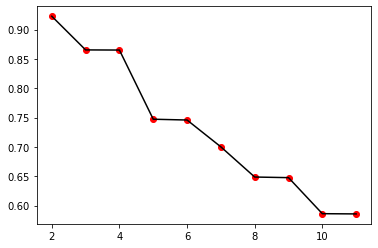

In [51]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [52]:
# Silhouette score for the KMeans clustering
vc=[2,3,4,5,6,7,8,9,10,11]
kc_score=[]    
for i in vc:
    km1 = KMeans(n_clusters=i, random_state=52,)

    jo=km1.fit_predict(dd.iloc[:,:12])
    kc_score.append(sil(dd.iloc[:,:12],jo))

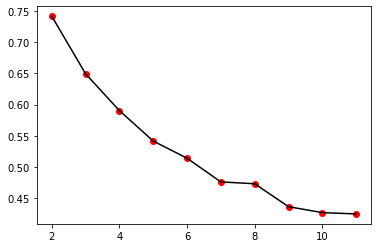

In [53]:
plt.plot(vc,kc_score,color="black")
plt.scatter(vc,kc_score,color="red")
plt.show()

### By looking at the above silhouetee scores for all the 3 models which we have built we can conclude that Heirarchical clustering is the best model for this dataset as it has the highest Silhouette score of 0.92, also we can say that the optimum number of clusters is 2 as the K-Means Elbow method has confirmed and the DBSCAN also has 2 clusters.

### Most of the observation lie in cluster 1 as per Dayssinceenroll followed by cluster 0 in the Heirarchical clustering. Interestingly we have only one observation in cluster 2 and it the one customer which is linked with the Airlines since more than 7000 days and has the highest balance in the dataset.